In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [46]:
train = pd.read_csv('data_source/train.csv')
test = pd.read_csv('data_source/test.csv')

x_train_byte = train.loc[:,['Destination Port', 'NAT Source Port','Packets', 'Elapsed Time (sec)','Bytes Received']]
y_train_byte = train.loc[:,'Action']
x_test_byte = test.loc[:,['Destination Port', 'NAT Source Port','Packets', 'Elapsed Time (sec)','Bytes Received']]
y_test_byte = test.loc[:,'Action']

In [47]:
scaler = StandardScaler()
x_train_byte.loc[:,['Packets','Elapsed Time (sec)','Bytes Received']] = scaler.fit_transform(x_train_byte.loc[:,['Packets','Elapsed Time (sec)','Bytes Received']])
x_test_byte.loc[:,['Packets','Elapsed Time (sec)','Bytes Received']] = scaler.fit_transform(x_test_byte.loc[:,['Packets','Elapsed Time (sec)','Bytes Received']])

y_train_byte.replace({'allow':0, 'deny':1, 'drop':2, 'reset-both':3},inplace=True)
y_test_byte.replace({'allow':0, 'deny':1, 'drop':2, 'reset-both':3},inplace=True)

In [48]:
clf = XGBClassifier(object='multi:softmax',num_class=4,seed=42)
clf.fit(x_train_byte,y_train_byte)
answer = clf.predict(x_test_byte)
print(classification_report(y_test_byte, answer))

[21:40:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11292
           1       0.97      1.00      0.99      4496
           2       1.00      1.00      1.00      3856
           3       1.00      0.62      0.77        16

    accuracy                           0.99     19660
   macro avg       0.99      0.90      0.94     19660
weighted avg       0.99      0.99      0.99     19660



In [49]:
parameters = {'object':['multi:softmax','multi:softprob'],
              'eval_metric':['merror','mlogloss'],
              'seed':[42]}

clf_best = GridSearchCV(clf, parameters, cv=5)
clf_best.fit(x_train_byte,y_train_byte)
print(clf_best.best_params_)
print(clf_best.best_estimator_)
answer = clf_best.predict(x_test_byte)
print(classification_report(y_test_byte, answer))

[21:40:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[21:40:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[21:40:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[21:40:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[21:40:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[21:40:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpytho

In [50]:
clf = XGBClassifier(object='multi:softmax',num_class=4,seed=42,eval_metric=['merror','mlogloss'])
clf.fit(x_train_byte,y_train_byte,eval_set=[(x_train_byte, y_train_byte), (x_test_byte, y_test_byte)])

# train_yhat = clf.predict(x_train_byte)
# train_f1 = f1_score(y_train_byte,train_yhat,average='weighted')

# test_yhat = clf.predict(x_test_byte)
# test_f1 = f1_score(y_test_byte,test_yhat,average='weighted')
# print('Train Score\n',classification_report(y_train_byte,train_yhat))
# print('Test Score\n',classification_report(y_test_byte, test_yhat))
# print(f"AVG F1-Score Train: {train_f1}\nAVG F1-Score Test: {test_f1}")

[21:40:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "object" } are not used.

[0]	validation_0-merror:0.00196	validation_0-mlogloss:0.85626	validation_1-merror:0.00351	validation_1-mlogloss:0.85880
[1]	validation_0-merror:0.00190	validation_0-mlogloss:0.58459	validation_1-merror:0.00402	validation_1-mlogloss:0.58862
[2]	validation_0-merror:0.00185	validation_0-mlogloss:0.41350	validation_1-merror:0.00351	validation_1-mlogloss:0.41845
[3]	validation_0-merror:0.00166	validation_0-mlogloss:0.29811	validation_1-merror:0.00351	validation_1-mlogloss:0.30394
[4]	validation_0-merror:0.00166	validation_0-mlogloss:0.21771	validation_1-merror:0.00351	validation_1-mlogloss:0.22432
[5]	validation_0-merror:0.00166	validation_0-mlogloss:0.16063	validation_1-merror:0.00351	validation_1-mlogloss:0.16781
[6]	validation_0-merror:0.00166	validation_0-mlogloss:0.11961	validation_1-merror:0.00351	validation_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=4, num_parallel_tree=None, object='multi:softmax', ...)

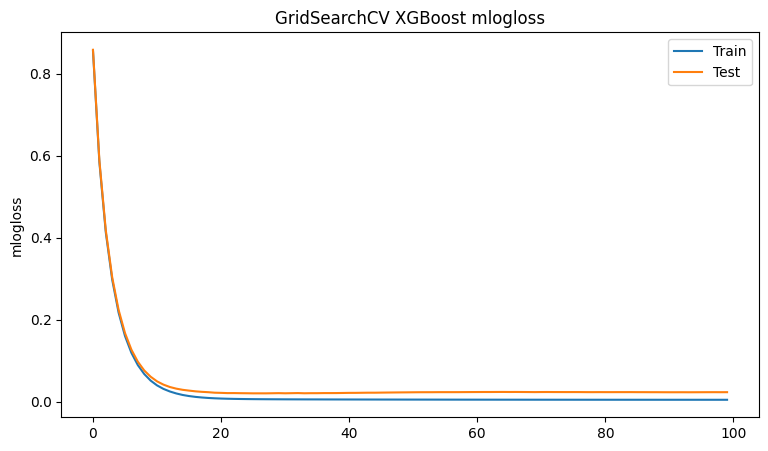

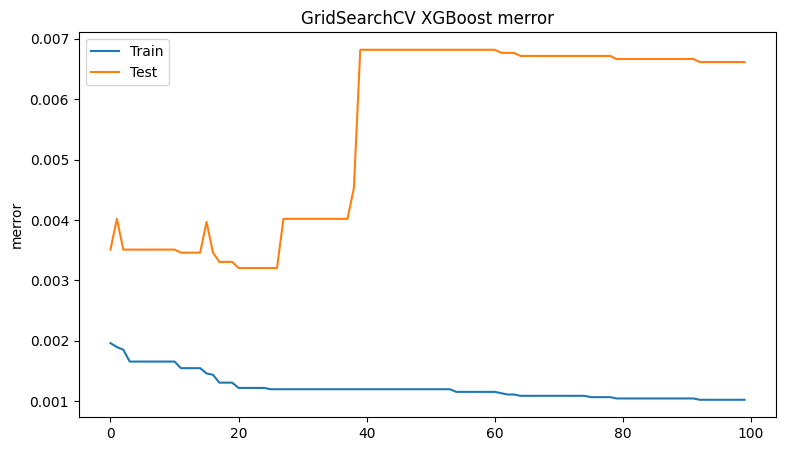

In [51]:
results = clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

In [52]:
## ---------- Model Classification Report ----------
## get predictions and create model quality report

y_pred = clf.predict(x_test_byte)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test_byte, y_pred))

print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test_byte, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test_byte, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test_byte, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test_byte, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test_byte, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test_byte, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test_byte, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test_byte, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test_byte, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test_byte, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test_byte, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test_byte, y_pred))
print('---------------------- XGBoost ----------------------') # unnecessary fancy styling


------------------ Confusion Matrix -----------------

[[11179   113     0     0]
 [    0  4485    11     0]
 [    0     0  3856     0]
 [    0     6     0    10]]

Accuracy: 0.99
Balanced Accuracy: 0.90

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.99
Macro Recall: 0.90
Macro F1-score: 0.94

Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11292
           1       0.97      1.00      0.99      4496
           2       1.00      1.00      1.00      3856
           3       1.00      0.62      0.77        16

    accuracy                           0.99     19660
   macro avg       0.99      0.90      0.94     19660
weighted avg       0.99      0.99      0.99     19660

---------------------- XGBoost ----------------------
